In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
data = pd.read_csv("ex1data1.txt",names = ['population','profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


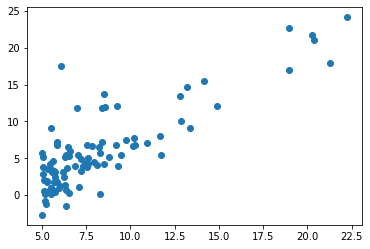

In [3]:
x = data.population
y = data.profit
fig = plt.figure()
plt.scatter(x,y)

In [4]:
df = data.copy()
df.insert(0,"one",1)
X = df.iloc[:,0:df.shape[1]-1]
theta = np.zeros((X.shape[1],1))
X = np.array(X)
y = np.array(y).reshape(X.shape[0],1)
x = np.array(x).reshape(X.shape[0],1)
theta = np.array(theta)
X,y,x,theta

(array([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598],
        [ 1.    ,  8.3829],
        [ 1.    ,  7.4764],
        [ 1.    ,  8.5781],
        [ 1.    ,  6.4862],
        [ 1.    ,  5.0546],
        [ 1.    ,  5.7107],
        [ 1.    , 14.164 ],
        [ 1.    ,  5.734 ],
        [ 1.    ,  8.4084],
        [ 1.    ,  5.6407],
        [ 1.    ,  5.3794],
        [ 1.    ,  6.3654],
        [ 1.    ,  5.1301],
        [ 1.    ,  6.4296],
        [ 1.    ,  7.0708],
        [ 1.    ,  6.1891],
        [ 1.    , 20.27  ],
        [ 1.    ,  5.4901],
        [ 1.    ,  6.3261],
        [ 1.    ,  5.5649],
        [ 1.    , 18.945 ],
        [ 1.    , 12.828 ],
        [ 1.    , 10.957 ],
        [ 1.    , 13.176 ],
        [ 1.    , 22.203 ],
        [ 1.    ,  5.2524],
        [ 1.    ,  6.5894],
        [ 1.    ,  9.2482],
        [ 1.    ,  5.8918],
        [ 1.    ,  8.2111],
        [ 1.    ,  7

In [5]:
def cost(X, y, theta):
    h = X @ theta
    erro = (h - y)**2
    return np.sum(erro)/(2*len(X))
cost(X,y,theta)

32.072733877455676

In [6]:
def gradient(X,y,theta,alpha = 0.01):
    h = X @ theta
    grad = (h-y).T @ X * alpha/len(X)
    return grad.T
gradient(X,y,theta)

array([[-0.05839135],
       [-0.6532885 ]])

In [7]:
def gradient_decent(X,y,theta,alpha,itera):
    costs = [cost(X,y,theta)]
    for i in range(itera):
        theta -= gradient(X,y,theta,alpha)
        costs.append(cost(X,y,theta))
    return theta,costs
final_theta,costs = gradient_decent(X,y,theta,alpha = 0.0001,itera = 1000)

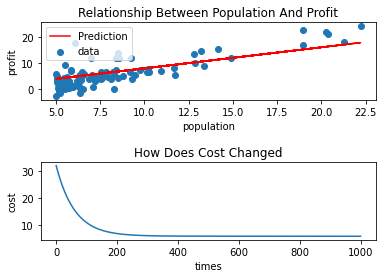

In [8]:
fig,(ax1,ax2) = plt.subplots(2,1)
H = X @ final_theta
ax1.plot(x,H,c = 'r',label = 'Prediction')
ax1.scatter(data.population,data.profit,label = 'data')
ax1.legend(loc = 2)
ax2.plot(costs)
ax1.set_xlabel('population')
ax1.set_ylabel('profit')
ax1.set_title('relationship between population and profit'.title())
ax2.set_xlabel('times')
ax2.set_ylabel('cost')
ax2.set_title('how does cost changed'.title())
fig.subplots_adjust(hspace = 0.8)

## 正则化线性回归

In [9]:
def gradient_reg(X,y,theta,l=1):
    reg = l/len(X)*theta[1:] 
    reg = np.vstack([0,reg])
    return gradient(X,y,theta) + reg
    
def gradient_decent_reg(X,y,theta,alpha,itera,l = 0.1):
    costs = [cost(X,y,theta)]
    for i in range(itera):
        theta -= alpha * gradient_reg(X,y,theta,l)
        costs.append(cost(X,y,theta))
    return theta,costs
theta = np.zeros((X.shape[1],1))
final_theta_reg,_ = gradient_decent_reg(X,y,theta,alpha = 0.01,itera =10000,l = 0.01)

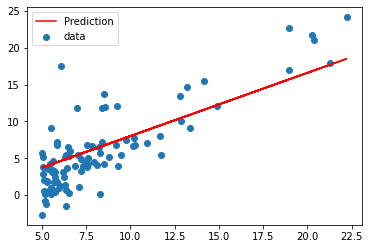

In [10]:
fig,ax1 = plt.subplots()
H = X @ final_theta_reg
ax1.plot(x,H,c = 'r',label = 'Prediction')
ax1.scatter(data.population,data.profit,label = 'data')
ax1.legend(loc = 2)
plt.show()

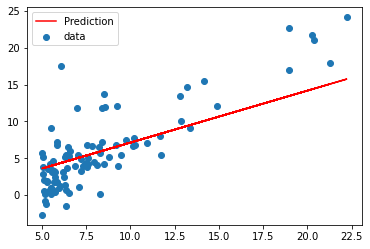

In [11]:
theta = np.zeros((X.shape[1],1))
final_theta_reg,_ = gradient_decent_reg(X,y,theta,alpha = 0.01,itera =10000,l = 10)
fig,ax1 = plt.subplots()
H = X @ final_theta_reg
ax1.plot(x,H,c = 'r',label = 'Prediction')
ax1.scatter(data.population,data.profit,label = 'data')
ax1.legend(loc = 2)
plt.show()

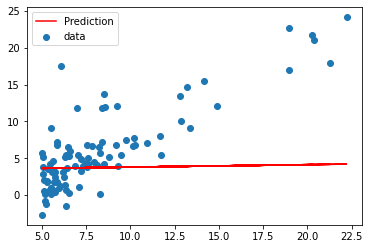

In [12]:
theta = np.zeros((X.shape[1],1))
final_theta_reg,_ = gradient_decent_reg(X,y,theta,alpha = 0.01,itera =10000,l = 1000)
fig,ax1 = plt.subplots()
H = X @ final_theta_reg
ax1.plot(x,H,c = 'r',label = 'Prediction')
ax1.scatter(data.population,data.profit,label = 'data')
ax1.legend(loc = 2)
plt.show()
##可见l = 1000时，惩罚过头了